In [1]:
import dhlab.nbtext as nb
from collections import Counter
from Giella_tekno_api import sami_word

In [2]:
def word_info(x, **kwargs):
    try:
        return sami_word(x, **kwargs)['analyses']
    except:
        return dict()

In [3]:
def unigram_agg(words, compare= None, **kwargs):
    import pandas as pd
    
    unis = dict()
    for w in words:
        unis[w] = nb.unigram(w, **kwargs)
        unis[w].columns = [w]
    agg = pd.concat([unis[w] for w in unis], sort=False, axis=1).sum(axis=1)
    if compare != None:
        comp = nb.unigram(compare, **kwargs)
        res = nb.frame(agg/comp[0])
    else:
        res = nb.frame(agg)
    return res

In [4]:
unigram_agg('spise spiser spiste'.split(), lang='sme', period=(1990, 2000))

,0
1993,27.0
1994,1.0
1995,8.0
1998,1.0
2000,2.0


In [5]:
word_info('leat', pos='V')

{'V+Inf': ['leat', 'leahkit'],
 'V+Ind+Prs+Sg1': ['lean'],
 'V+Ind+Prs+Sg2': ['leat'],
 'V+Ind+Prs+Sg3': ['lea'],
 'V+Ind+Prs+Du1': ['letne', 'ledne'],
 'V+Ind+Prs+Du2': ['leahppi'],
 'V+Ind+Prs+Du3': ['leaba'],
 'V+Ind+Prs+Pl1': ['leat'],
 'V+Ind+Prs+Pl2': ['lehpet'],
 'V+Ind+Prs+Pl3': ['leat'],
 'V+Ind+Prs+ConNeg': ['leat'],
 'V+Ind+Prt+Sg1': ['ledjen'],
 'V+Ind+Prt+Sg2': ['ledjet'],
 'V+Ind+Prt+Sg3': ['lei', 'leai'],
 'V+Ind+Prt+Du1': ['leimme'],
 'V+Ind+Prt+Du2': ['leidde'],
 'V+Ind+Prt+Du3': ['leaigga', 'leigga'],
 'V+Ind+Prt+Pl1': ['leimmet'],
 'V+Ind+Prt+Pl2': ['leiddet'],
 'V+Ind+Prt+Pl3': ['ledje'],
 'V+Ind+Prt+ConNeg': ['lean'],
 'V+Cond+Prs+Sg1': ['livččen'],
 'V+Cond+Prs+Sg2': ['livččet'],
 'V+Cond+Prs+Sg3': ['livččii'],
 'V+Cond+Prs+Du1': ['livččiime'],
 'V+Cond+Prs+Du2': ['livččiide'],
 'V+Cond+Prs+Du3': ['livččiiga'],
 'V+Cond+Prs+Pl1': ['livččiimet'],
 'V+Cond+Prs+Pl2': ['livččiidet'],
 'V+Cond+Prs+Pl3': ['livčče'],
 'V+Cond+Prs+ConNeg': ['livčče'],
 'V+Imprt+Sg1': ['le

In [6]:
urn = nb.book_urn(lang='sme', limit=3000)

len(urn)

1032

In [7]:
step =300
sami_count = Counter()
for i in range(0, len(urn), step):
    print(i)
    sami_count.update(nb.aggregate_urns(urn[i:i+step]))

0
300
600
900


In [8]:
tot_sami = nb.frame_sort(nb.frame(sami_count, 'counts'))

In [9]:
ref_urn = nb.refine_book_urn(words='oktasaš', lang='sme',urns=urn,limit=1000 )
len(ref_urn)

892

In [10]:
forms = word_info("oahpaheamis")

In [11]:
fisk_v = word_info('bivdit')


In [12]:
fisk_n = word_info('bivdit', pos='N')

In [135]:
bivdit_v = word_info('bivdit')

In [13]:
def invert(definition):
    return {k:[v for v in definition.keys() if k in definition[v]] for values in definition.values() for k in values} 

In [136]:
invert(bivdit_v)['bivdi']

['V+Imprt+Du2', 'V+PrsPrc']

In [137]:
bivdit_df = nb.frame(invert(bivdit_v))

In [16]:
def distribution(forms, tot_sami):
    words = {z for x in forms for z in x}

    words_pluss = [w for w in words if w in tot_sami.index]
    words_minus = [w for w in words if not w in tot_sami.index]

    print('med belegg:',len(words_pluss), 'uten belegg:', len(words_minus))

    return tot_sami.loc[words_pluss].sort_values(by='counts', ascending=False)

In [139]:
dist = distribution(bivdit_v.values(), tot_sami)

med belegg: 35 uten belegg: 55


In [140]:
dist

,counts
bivdit,1786
bivde,637
bivddii,352
bivdu,340
bivdet,336
bivdi,215
bivdimin,146
bivdde,121
bivdán,92
bivdin,83


In [19]:
dist.head(10).index

Index(['bivdit', 'bivde', 'bivddii', 'bivdu', 'bivdet', 'bivdi', 'bivdimin',
       'bivdde', 'bivdán', 'bivdin'],
      dtype='object')

In [141]:
dist.loc[[x for x in dist.head(10).index if x in fisk_v_df.index]].fillna('')

,counts
bivdit,1786
bivde,637
bivddii,352
bivdu,340
bivdet,336
bivdi,215
bivdimin,146
bivdde,121
bivdán,92
bivdin,83


In [21]:
form_dist = lambda df, dist: df.loc[[x for x in dist.head(10).index if x in df.index]].fillna('')

In [22]:
sami_word("oahpaheamis", pos='N')

{'analyses': {'N+Sg+Nom': ['oahpaheapmi'],
  'N+Sg+Gen': ['oahpaheame', 'oahpaheami'],
  'N+Sg+Gen+Allegro': ['oahpaheame'],
  'N+Sg+Acc': ['oahpaheami'],
  'N+Sg+Ill': ['oahpaheapmái'],
  'N+Sg+Loc': ['oahpaheames', 'oahpaheamis'],
  'N+Sg+Com': ['oahpahemiin'],
  'N+Pl+Nom': ['oahpaheamit'],
  'N+Pl+Gen': ['oahpahemiid'],
  'N+Pl+Acc': ['oahpahemiid'],
  'N+Pl+Ill': ['oahpahemiide'],
  'N+Pl+Loc': ['oahpahemiin'],
  'N+Pl+Com': ['oahpahemiiguin'],
  'N+Ess': ['oahpaheamen', 'oahpaheame', 'oahpaheapmin'],
  'N+Sg+Nom+PxSg1': ['oahpaheapmán'],
  'N+Sg+Nom+PxSg2': ['oahpaheapmát'],
  'N+Sg+Nom+PxSg3': ['oahpaheapmis'],
  'N+Sg+Nom+PxDu1': ['oahpaheapmáme'],
  'N+Sg+Nom+PxDu2': ['oahpaheapmáde'],
  'N+Sg+Nom+PxDu3': ['oahpaheapmiska'],
  'N+Sg+Nom+PxPl1': ['oahpaheapmámet'],
  'N+Sg+Nom+PxPl2': ['oahpaheapmádet'],
  'N+Sg+Nom+PxPl3': ['oahpaheapmiset'],
  'N+Sg+Gen+PxSg1': ['oahpaheapmán'],
  'N+Sg+Gen+PxSg2': ['oahpaheamát'],
  'N+Sg+Gen+PxSg3': ['oahpaheamis'],
  'N+Sg+Gen+PxDu1': ['oa

In [23]:
rein_n_df = nb.frame(word_info('boazu', pos='N'))

In [24]:
rein_n = word_info('boazu', pos='N')

In [25]:
snøscooter = word_info('muohtaskohter', pos='N')

In [26]:
distribution(snøscooter.values(), tot_sami)

med belegg: 7 uten belegg: 64


,counts
muohtaskohtera,27
muohtaskohteriin,18
muohtaskohter,18
muohtaskohteriid,8
muohtaskohterat,6
muohtaskohteriiguin,1
muohtaskohteris,1


In [27]:
form_distribution = lambda x: form_dist(nb.frame(invert(x)), distribution(x.values(), tot_sami)) 

In [28]:
form_dist(nb.frame(invert(snøscooter)), distribution(snøscooter.values(), tot_sami))

med belegg: 7 uten belegg: 64


,0,1,2,3
muohtaskohtera,N+Sg+Gen,N+Sg+Acc,,
muohtaskohteriin,N+Sg+Com,N+Pl+Loc,,
muohtaskohter,N+Sg+Nom,,,
muohtaskohteriid,N+Pl+Gen,N+Pl+Acc,,
muohtaskohterat,N+Pl+Nom,N+Sg+Nom+PxSg2,N+Sg+Gen+PxSg2,N+Sg+Acc+PxSg2
muohtaskohteriiguin,N+Pl+Com,,,
muohtaskohteris,N+Sg+Loc,N+Sg+Gen+PxSg3,N+Sg+Acc+PxSg3,


In [29]:
rein_n_df

,0
N+Sg+Nom,boazu
N+Sg+Gen,bohcco
N+Sg+Acc,bohcco
N+Sg+Ill,bohccui
N+Sg+Loc,bohccos
N+Sg+Com,bohccuin
N+Pl+Nom,bohccot
N+Pl+Gen,bohccuid
N+Pl+Acc,bohccuid
N+Pl+Ill,bohccuide


In [30]:
nb.unigram('lea', lang='sme', period=(1900, 2020))

,0
1938,1
1959,6
1962,1
1979,1251
1980,1611
1981,1050
1982,1624
1983,2309
1984,9209
1985,2092


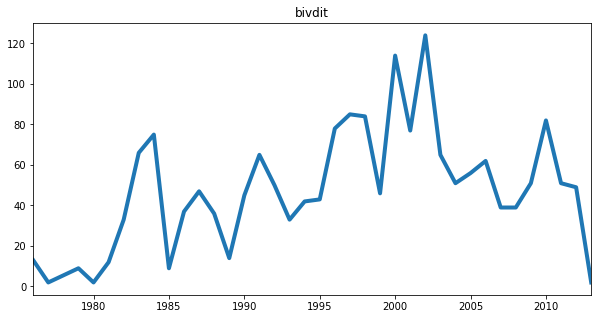

In [154]:
(nb.unigram('bivdit', lang='sme', period=(1970, 2020))).plot(figsize=(10,5), lw=4, title='bivdit', legend=False)

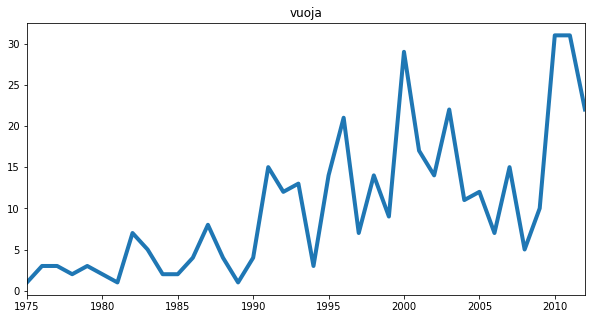

In [156]:
(nb.unigram('vuoja', lang='sme', period=(1970, 2020))).plot(figsize=(10,5), lw=4, title='vuoja', legend=False)

In [33]:
fisk_v_df.head(5).index

Index(['bivdit', 'bivddán', 'bivddát', 'bivdá', 'bivde'], dtype='object')

In [34]:
rein_n_df.index

Index(['N+Sg+Nom', 'N+Sg+Gen', 'N+Sg+Acc', 'N+Sg+Ill', 'N+Sg+Loc', 'N+Sg+Com',
       'N+Pl+Nom', 'N+Pl+Gen', 'N+Pl+Acc', 'N+Pl+Ill',
       ...
       'N+Pl+Com+PxPl3', 'N+Ess+PxSg1', 'N+Ess+PxSg2', 'N+Ess+PxSg3',
       'N+Ess+PxDu1', 'N+Ess+PxDu2', 'N+Ess+PxDu3', 'N+Ess+PxPl1',
       'N+Ess+PxPl2', 'N+Ess+PxPl3'],
      dtype='object', length=121)

In [35]:
distribution(rein_n.values(), tot_sami)

med belegg: 25 uten belegg: 55


,counts
bohccuid,2960
bohccot,2352
bohcco,2336
boazu,2259
bohccos,436
bohccuiguin,423
bohccuin,337
bohccuide,282
bohccui,172
bohccuideaset,101


In [36]:
smør = word_info('vuodja', pos='N')
smør

{'N+Sg+Nom': ['vuodja'],
 'N+Sg+Gen': ['vuoja'],
 'N+Sg+Gen+Allegro': ['vuoja'],
 'N+Sg+Acc': ['vuoja'],
 'N+Sg+Ill': ['vudjii'],
 'N+Sg+Loc': ['vuojas'],
 'N+Sg+Com': ['vuojain'],
 'N+Pl+Nom': ['vuojat'],
 'N+Pl+Gen': ['vuojaid'],
 'N+Pl+Acc': ['vuojaid'],
 'N+Pl+Ill': ['vuojaide'],
 'N+Pl+Loc': ['vuojain'],
 'N+Pl+Com': ['vuojaiguin'],
 'N+Ess': ['vuodjan'],
 'N+Sg+Nom+PxSg1': ['vuodjan'],
 'N+Sg+Nom+PxSg2': ['vuodjat'],
 'N+Sg+Nom+PxDu1': ['vuodjame'],
 'N+Sg+Nom+PxDu2': ['vuodjade'],
 'N+Sg+Nom+PxPl1': ['vuodjamet'],
 'N+Sg+Nom+PxPl2': ['vuodjadet'],
 'N+Sg+Gen+PxSg1': ['vuodjan'],
 'N+Sg+Gen+PxSg2': ['vuojat'],
 'N+Sg+Gen+PxSg3': ['vuojas'],
 'N+Sg+Gen+PxDu1': ['vuodjame'],
 'N+Sg+Gen+PxDu2': ['vuojade'],
 'N+Sg+Gen+PxDu3': ['vuojaska'],
 'N+Sg+Gen+PxPl1': ['vuodjamet'],
 'N+Sg+Gen+PxPl2': ['vuojadet'],
 'N+Sg+Gen+PxPl3': ['vuojaset'],
 'N+Sg+Acc+PxSg1': ['vuodjan'],
 'N+Sg+Acc+PxSg2': ['vuojat'],
 'N+Sg+Acc+PxSg3': ['vuojas'],
 'N+Sg+Acc+PxDu1': ['vuodjame'],
 'N+Sg+Acc+PxDu2': [

In [37]:
smør2 = word_info('gusavuodja', pos='N')
smør2

{'N+Sg+Nom': ['gusavuodja'],
 'N+Sg+Gen': ['gusavuoja'],
 'N+Sg+Gen+Allegro': ['gusavuoja'],
 'N+Sg+Acc': ['gusavuoja'],
 'N+Sg+Ill': ['gusavudjii'],
 'N+Sg+Loc': ['gusavuojas'],
 'N+Sg+Com': ['gusavuojain'],
 'N+Pl+Nom': ['gusavuojat'],
 'N+Pl+Gen': ['gusavuojaid'],
 'N+Pl+Acc': ['gusavuojaid'],
 'N+Pl+Ill': ['gusavuojaide'],
 'N+Pl+Loc': ['gusavuojain'],
 'N+Pl+Com': ['gusavuojaiguin'],
 'N+Ess': ['gusavuodjan'],
 'N+Sg+Nom+PxSg1': ['gusavuodjan'],
 'N+Sg+Nom+PxSg2': ['gusavuodjat'],
 'N+Sg+Nom+PxDu1': ['gusavuodjame'],
 'N+Sg+Nom+PxDu2': ['gusavuodjade'],
 'N+Sg+Nom+PxPl1': ['gusavuodjamet'],
 'N+Sg+Nom+PxPl2': ['gusavuodjadet'],
 'N+Sg+Gen+PxSg1': ['gusavuodjan'],
 'N+Sg+Gen+PxSg2': ['gusavuojat'],
 'N+Sg+Gen+PxSg3': ['gusavuojas'],
 'N+Sg+Gen+PxDu1': ['gusavuodjame'],
 'N+Sg+Gen+PxDu2': ['gusavuojade'],
 'N+Sg+Gen+PxDu3': ['gusavuojaska'],
 'N+Sg+Gen+PxPl1': ['gusavuodjamet'],
 'N+Sg+Gen+PxPl2': ['gusavuojadet'],
 'N+Sg+Gen+PxPl3': ['gusavuojaset'],
 'N+Sg+Acc+PxSg1': ['gusavuodja

In [38]:
fett = word_info('buoidi', pos='N')
fett

{'N+Sg+Nom': ['buoidi'],
 'N+Sg+Gen': ['buoidde', 'buoiddi'],
 'N+Sg+Gen+Allegro': ['buoidde'],
 'N+Sg+Acc': ['buoiddi'],
 'N+Sg+Ill': ['buoidái'],
 'N+Sg+Loc': ['buoiddis'],
 'N+Sg+Com': ['buiddiin'],
 'N+Pl+Nom': ['buoiddit'],
 'N+Pl+Gen': ['buiddiid'],
 'N+Pl+Acc': ['buiddiid'],
 'N+Pl+Ill': ['buiddiide'],
 'N+Pl+Loc': ['buiddiin'],
 'N+Pl+Com': ['buiddiiguin'],
 'N+Ess': ['buoidin'],
 'N+Sg+Nom+PxSg1': ['buoidán'],
 'N+Sg+Nom+PxSg2': ['buoidát'],
 'N+Sg+Nom+PxDu1': ['buoidáme'],
 'N+Sg+Nom+PxDu2': ['buoidáde'],
 'N+Sg+Nom+PxPl1': ['buoidámet'],
 'N+Sg+Nom+PxPl2': ['buoidádet'],
 'N+Sg+Gen+PxSg1': ['buoidán'],
 'N+Sg+Gen+PxSg2': ['buoiddát'],
 'N+Sg+Gen+PxSg3': ['buoiddis'],
 'N+Sg+Gen+PxDu1': ['buoidáme'],
 'N+Sg+Gen+PxDu2': ['buoiddáde'],
 'N+Sg+Gen+PxDu3': ['buoiddiska'],
 'N+Sg+Gen+PxPl1': ['buoidámet'],
 'N+Sg+Gen+PxPl2': ['buoiddádet'],
 'N+Sg+Gen+PxPl3': ['buoiddiset'],
 'N+Sg+Acc+PxSg1': ['buoidán'],
 'N+Sg+Acc+PxSg2': ['buoiddát'],
 'N+Sg+Acc+PxSg3': ['buoiddis'],
 'N+Sg+Ac

In [39]:
fett2 = word_info('sisbuoiddit', pos='N')
fett2

{'N+Sg+Nom': ['sisbuoidi'],
 'N+Sg+Gen': ['sisbuoidde', 'sisbuoiddi'],
 'N+Sg+Gen+Allegro': ['sisbuoidde'],
 'N+Sg+Acc': ['sisbuoiddi'],
 'N+Sg+Ill': ['sisbuoidái'],
 'N+Sg+Loc': ['sisbuoiddis'],
 'N+Sg+Com': ['sisbuiddiin'],
 'N+Pl+Nom': ['sisbuoiddit'],
 'N+Pl+Gen': ['sisbuiddiid'],
 'N+Pl+Acc': ['sisbuiddiid'],
 'N+Pl+Ill': ['sisbuiddiide'],
 'N+Pl+Loc': ['sisbuiddiin'],
 'N+Pl+Com': ['sisbuiddiiguin'],
 'N+Ess': ['sisbuoidin'],
 'N+Sg+Nom+PxSg1': ['sisbuoidán'],
 'N+Sg+Nom+PxSg2': ['sisbuoidát'],
 'N+Sg+Nom+PxDu1': ['sisbuoidáme'],
 'N+Sg+Nom+PxDu2': ['sisbuoidáde'],
 'N+Sg+Nom+PxPl1': ['sisbuoidámet'],
 'N+Sg+Nom+PxPl2': ['sisbuoidádet'],
 'N+Sg+Gen+PxSg1': ['sisbuoidán'],
 'N+Sg+Gen+PxSg2': ['sisbuoiddát'],
 'N+Sg+Gen+PxSg3': ['sisbuoiddis'],
 'N+Sg+Gen+PxDu1': ['sisbuoidáme'],
 'N+Sg+Gen+PxDu2': ['sisbuoiddáde'],
 'N+Sg+Gen+PxDu3': ['sisbuoiddiska'],
 'N+Sg+Gen+PxPl1': ['sisbuoidámet'],
 'N+Sg+Gen+PxPl2': ['sisbuoiddádet'],
 'N+Sg+Gen+PxPl3': ['sisbuoiddiset'],
 'N+Sg+Acc+PxSg1'

In [40]:
distribution(smør2.values(), tot_sami)

med belegg: 6 uten belegg: 76


,counts
gusavuoja,27
gusavuodja,25
gusavuojain,5
gusavuojas,2
gusavuojaid,1
gusavuodjan,1


In [41]:
distribution(smør.values(), tot_sami)

med belegg: 13 uten belegg: 69


,counts
vuoja,393
vuodja,324
vuodjat,210
vuojas,67
vuodjan,59
vuojain,37
vuojaid,20
vudjii,18
vuojat,15
vuodjame,7


In [42]:
distribution(fett.values(), tot_sami)

med belegg: 11 uten belegg: 74


,counts
buoidi,494
buoiddi,184
buoiddit,71
buiddiid,52
buoiddis,32
buoidde,28
buiddiin,22
buoidin,13
buiddiiguin,3
buiddiinis,2


In [43]:
distribution(fett2.values(), tot_sami)

med belegg: 0 uten belegg: 85


,counts


In [44]:
invert(fett)

{'buoidi': ['N+Sg+Nom'],
 'buoidde': ['N+Sg+Gen', 'N+Sg+Gen+Allegro'],
 'buoiddi': ['N+Sg+Gen', 'N+Sg+Acc'],
 'buoidái': ['N+Sg+Ill'],
 'buoiddis': ['N+Sg+Loc', 'N+Sg+Gen+PxSg3', 'N+Sg+Acc+PxSg3'],
 'buiddiin': ['N+Sg+Com', 'N+Pl+Loc'],
 'buoiddit': ['N+Pl+Nom'],
 'buiddiid': ['N+Pl+Gen', 'N+Pl+Acc'],
 'buiddiide': ['N+Pl+Ill'],
 'buiddiiguin': ['N+Pl+Com'],
 'buoidin': ['N+Ess'],
 'buoidán': ['N+Sg+Nom+PxSg1', 'N+Sg+Gen+PxSg1', 'N+Sg+Acc+PxSg1'],
 'buoidát': ['N+Sg+Nom+PxSg2'],
 'buoidáme': ['N+Sg+Nom+PxDu1', 'N+Sg+Gen+PxDu1', 'N+Sg+Acc+PxDu1'],
 'buoidáde': ['N+Sg+Nom+PxDu2'],
 'buoidámet': ['N+Sg+Nom+PxPl1', 'N+Sg+Gen+PxPl1', 'N+Sg+Acc+PxPl1'],
 'buoidádet': ['N+Sg+Nom+PxPl2'],
 'buoiddát': ['N+Sg+Gen+PxSg2', 'N+Sg+Acc+PxSg2'],
 'buoiddáde': ['N+Sg+Gen+PxDu2', 'N+Sg+Acc+PxDu2'],
 'buoiddiska': ['N+Sg+Gen+PxDu3', 'N+Sg+Acc+PxDu3'],
 'buoiddádet': ['N+Sg+Gen+PxPl2', 'N+Sg+Acc+PxPl2'],
 'buoiddiset': ['N+Sg+Gen+PxPl3', 'N+Sg+Acc+PxPl3'],
 'buoidásan': ['N+Sg+Ill+PxSg1'],
 'buoidásat': 

In [45]:
invert(smør)

{'vuodja': ['N+Sg+Nom'],
 'vuoja': ['N+Sg+Gen', 'N+Sg+Gen+Allegro', 'N+Sg+Acc'],
 'vudjii': ['N+Sg+Ill'],
 'vuojas': ['N+Sg+Loc', 'N+Sg+Gen+PxSg3', 'N+Sg+Acc+PxSg3'],
 'vuojain': ['N+Sg+Com', 'N+Pl+Loc'],
 'vuojat': ['N+Pl+Nom', 'N+Sg+Gen+PxSg2', 'N+Sg+Acc+PxSg2'],
 'vuojaid': ['N+Pl+Gen', 'N+Pl+Acc'],
 'vuojaide': ['N+Pl+Ill'],
 'vuojaiguin': ['N+Pl+Com'],
 'vuodjan': ['N+Ess', 'N+Sg+Nom+PxSg1', 'N+Sg+Gen+PxSg1', 'N+Sg+Acc+PxSg1'],
 'vuodjat': ['N+Sg+Nom+PxSg2'],
 'vuodjame': ['N+Sg+Nom+PxDu1', 'N+Sg+Gen+PxDu1', 'N+Sg+Acc+PxDu1'],
 'vuodjade': ['N+Sg+Nom+PxDu2'],
 'vuodjamet': ['N+Sg+Nom+PxPl1', 'N+Sg+Gen+PxPl1', 'N+Sg+Acc+PxPl1'],
 'vuodjadet': ['N+Sg+Nom+PxPl2'],
 'vuojade': ['N+Sg+Gen+PxDu2', 'N+Sg+Acc+PxDu2'],
 'vuojaska': ['N+Sg+Gen+PxDu3', 'N+Sg+Acc+PxDu3'],
 'vuojadet': ['N+Sg+Gen+PxPl2', 'N+Sg+Acc+PxPl2'],
 'vuojaset': ['N+Sg+Gen+PxPl3', 'N+Sg+Acc+PxPl3'],
 'vuodjasan': ['N+Sg+Ill+PxSg1'],
 'vuodjasat': ['N+Sg+Ill+PxSg2'],
 'vuodjasis': ['N+Sg+Ill+PxSg3'],
 'vuodjaseame': ['N+

In [123]:
bivdit_df = distribution(bivdit_df.values(), tot_sami)

med belegg: 13 uten belegg: 69


In [134]:
bivdit_df

,counts
vuoja,393
vuodja,324
vuodjat,210
vuojas,67
vuodjan,59
vuojain,37
vuojaid,20
vudjii,18
vuojat,15
vuodjame,7


In [132]:
fisk_v_df

,0,1,2
bivdit,V+Inf,V+Ind+Prs+Pl1,V+Imprt+Pl2
bivddán,V+Ind+Prs+Sg1,None,None
bivddát,V+Ind+Prs+Sg2,None,None
bivdá,V+Ind+Prs+Sg3,None,None
bivde,V+Ind+Prs+Du1,V+Ind+Prt+Pl3,None
bivdibeahtti,V+Ind+Prs+Du2,None,None
bivdiba,V+Ind+Prs+Du3,None,None
bivdibehtet,V+Ind+Prs+Pl2,None,None
bivdet,V+Ind+Prs+Pl3,V+Ind+Prt+Sg2,V+Imprt+Pl2
bivdde,V+Ind+Prs+ConNeg,V+Imprt+Sg2,V+Imprt+ConNeg


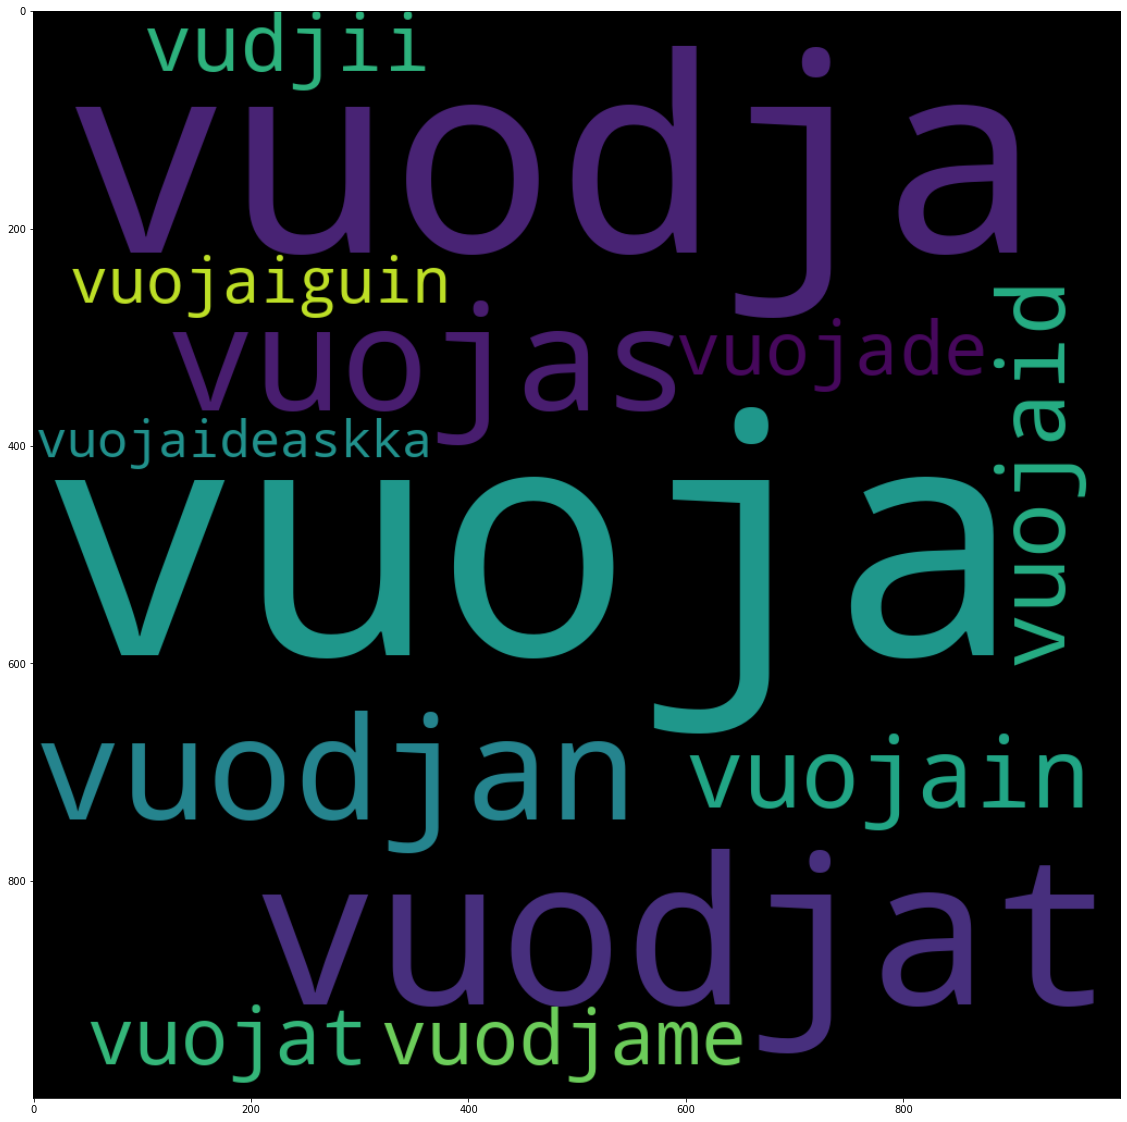

In [133]:
nb.cloud(bivdit_df/bivdit_df.sum())

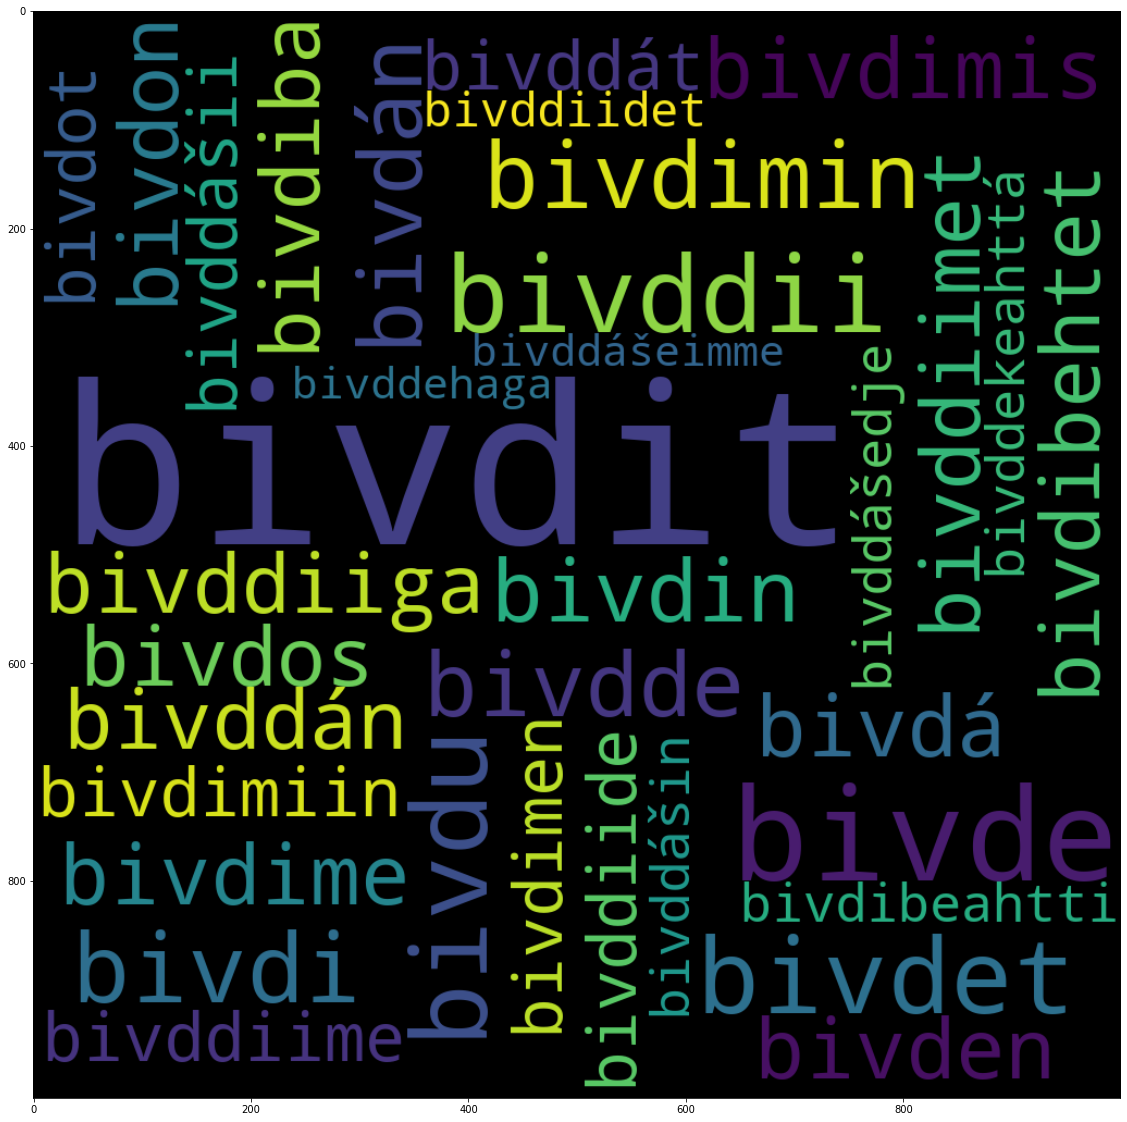

In [144]:
nb.cloud(dist/dist.sum())

In [121]:
len(invert(smør))

82

In [46]:
være = word_info('leat', pos='V')
være

{'V+Inf': ['leat', 'leahkit'],
 'V+Ind+Prs+Sg1': ['lean'],
 'V+Ind+Prs+Sg2': ['leat'],
 'V+Ind+Prs+Sg3': ['lea'],
 'V+Ind+Prs+Du1': ['letne', 'ledne'],
 'V+Ind+Prs+Du2': ['leahppi'],
 'V+Ind+Prs+Du3': ['leaba'],
 'V+Ind+Prs+Pl1': ['leat'],
 'V+Ind+Prs+Pl2': ['lehpet'],
 'V+Ind+Prs+Pl3': ['leat'],
 'V+Ind+Prs+ConNeg': ['leat'],
 'V+Ind+Prt+Sg1': ['ledjen'],
 'V+Ind+Prt+Sg2': ['ledjet'],
 'V+Ind+Prt+Sg3': ['lei', 'leai'],
 'V+Ind+Prt+Du1': ['leimme'],
 'V+Ind+Prt+Du2': ['leidde'],
 'V+Ind+Prt+Du3': ['leaigga', 'leigga'],
 'V+Ind+Prt+Pl1': ['leimmet'],
 'V+Ind+Prt+Pl2': ['leiddet'],
 'V+Ind+Prt+Pl3': ['ledje'],
 'V+Ind+Prt+ConNeg': ['lean'],
 'V+Cond+Prs+Sg1': ['livččen'],
 'V+Cond+Prs+Sg2': ['livččet'],
 'V+Cond+Prs+Sg3': ['livččii'],
 'V+Cond+Prs+Du1': ['livččiime'],
 'V+Cond+Prs+Du2': ['livččiide'],
 'V+Cond+Prs+Du3': ['livččiiga'],
 'V+Cond+Prs+Pl1': ['livččiimet'],
 'V+Cond+Prs+Pl2': ['livččiidet'],
 'V+Cond+Prs+Pl3': ['livčče'],
 'V+Cond+Prs+ConNeg': ['livčče'],
 'V+Imprt+Sg1': ['le

In [47]:
være_df = distribution(være.values(), tot_sami)
være_df

med belegg: 61 uten belegg: 4


,counts
lea,234100
leat,178337
lei,90658
ledje,34423
lean,30800
leai,13381
ledjen,3890
leigga,3548
leamaš,2964
leaba,2612


In [48]:
uni_være = unigram_agg(være_df.head(10).index)

In [49]:
uni_være.columns = ['leat']

In [50]:
ja =nb.frame(nb.unigram('ja'), 'ja')

In [51]:
import pandas as pd

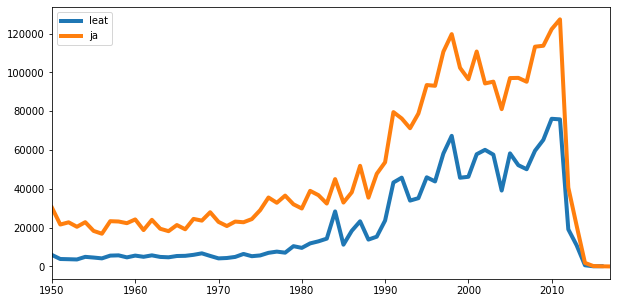

In [52]:
pd.concat([uni_være, ja], axis=1).plot(figsize=(10,5), lw=4)

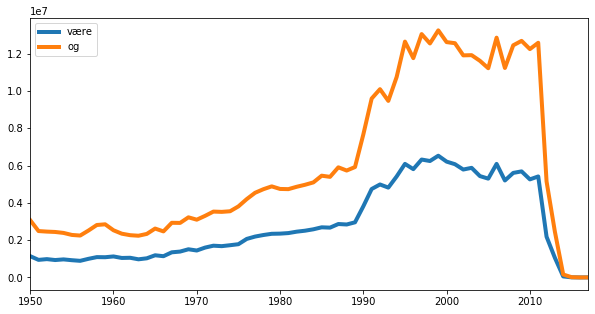

In [53]:
pd.concat([nb.frame(nb.unigram('er'), 'være'), nb.frame(nb.unigram('og'), 'og')], axis=1).plot(figsize=(10,5), lw=4)

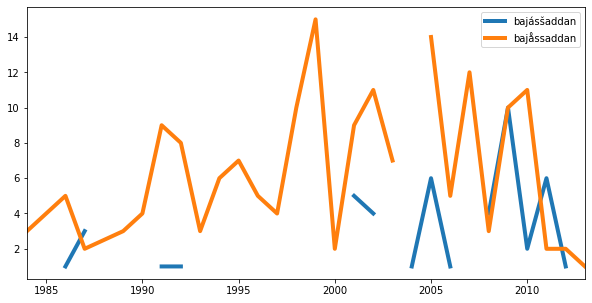

In [110]:
pd.concat([nb.frame(nb.unigram('bajásšaddan', lang='sme'), 'bajásšaddan'), nb.frame(nb.unigram('bajåssaddan', lang='sme'), 'bajåssaddan')], axis=1).plot(figsize=(10,5), lw=4)

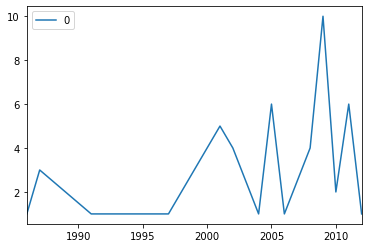

In [99]:
nb.unigram('bajásšaddan', lang='sme').plot()

In [107]:
tot_sami.loc[]

TypeError: unhashable type: 'list'

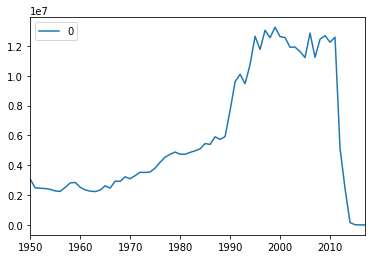

In [54]:
nb.unigram('og').plot()

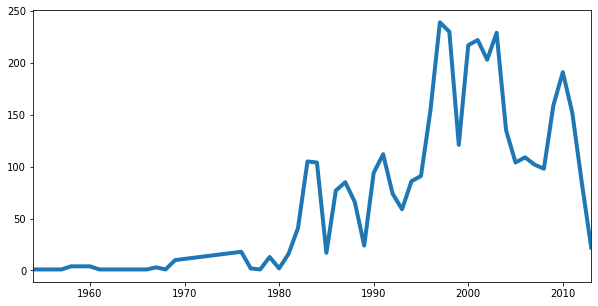

In [55]:
unigram_agg(fisk_v_df.head(10).index).plot(figsize=(10,5), lw=4, legend=False)

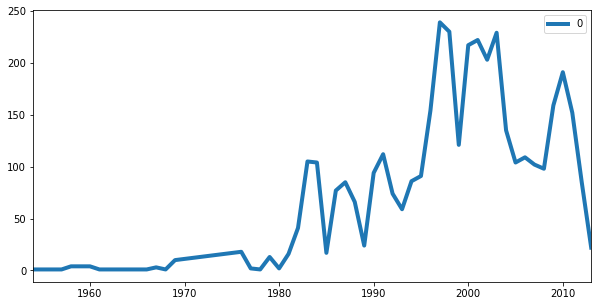

In [56]:
unigram_agg(fisk_v_df.head(10).index).plot(figsize=(10,5), lw=4)

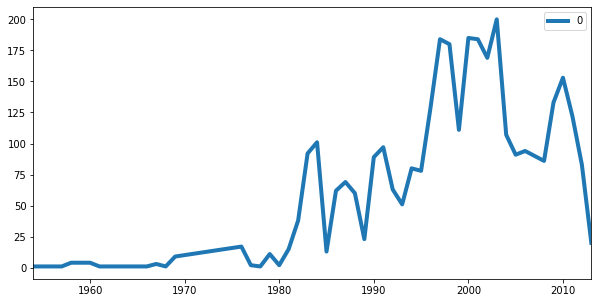

In [57]:
unigram_agg(fisk_v_df.head(5).index).plot(figsize=(10,5), lw=4)

In [58]:
unigram_agg(fisk_v_df.head(5).index)

,0
1954,1.0
1956,1.0
1957,1.0
1958,4.0
1960,4.0
1961,1.0
1963,1.0
1965,1.0
1966,1.0
1967,3.0


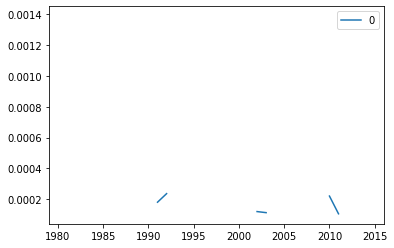

In [59]:
(nb.unigram('muohtaskohtera', lang='sme', period=(1970, 2020))/nb.unigram('leat', lang='sme', period=(1970,2020))).plot()

In [60]:
konk = lambda x, ref_urn: nb.urn_concordance(word=x, urns=nb.refine_book_urn(words=x, urns=ref_urn))

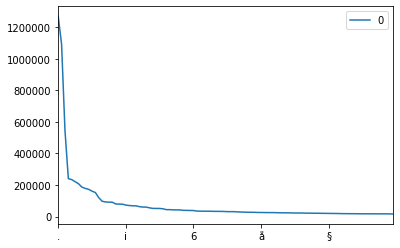

In [61]:
nb.frame(dict(sami_count.most_common(100))).plot()

In [62]:
sami_count['gillii']

1211

In [63]:
len(sami_count.keys())

1442261

In [64]:
sami = nb.frame(sami_count)
nb.frame_sort(sami)

,0
.,1270915
",",1093430
ja,546924
-,240248
lea,234100
),221200
',208081
:,186561
leat,178337
go,172346


In [65]:
konk('bivdit', urn)

"Golgadeamen, Guttorm, Hans Aslak, 1982",Guolihan åitto songe f erte,bivdit,. Ammal Bikka-åhkkuge sat i
"Golgadeamen, Guttorm, Hans Aslak, 1982",Cuonje-Mågga . Dolin låvii cuotnjagiid,bivdit,", ja nu olbmot gohcodisgohte"
"Eallit váibmodávddain, Hånes, Hanna, 1993",* Såhtåt,bivdit,beassat searvamis studenattaid
"Vilges bárru, Mienna, Jens Martin, 2010",maid . Dávjá manaiga ovttas,bivdit,", murjet ja dálvet ges"
"Abraham - Jesus, Eira, Inga Ravna, 1995",Dås duohko galggat don olbmuid,bivdit,. » De suhke sii
"Konferanssa rápporta Sámenissoniid eallindilli, , 1994",fertejm mångii eadnai dorwastit ja,bivdit,rådi . Mun oidnen ahtte
"Konferanssa rápporta Sámenissoniid eallindilli, , 1994","galgå bures lihkostuvvot , mii",bivdit,veahki coavdit cuowuvas konkrehtalas våttisvuodaid
"Konferanssa rápporta Sámenissoniid eallindilli, , 1994",mi våldit diiiiguin oktavuoda ja,bivdit,veahki buoridit ruossa såpmelaccaide dilålasvuoda


In [66]:
nb.concordance(word='bivdit', subject='fiske', lang='sma', kind='html')

In [67]:
nb.book_corpus(lang='sma', limit=3000)

,urn,author,title,year
0,2015062208002,"Joma, Liv Karin",Gïeline åahpenidh 3,2011
1,2015021006039,"Joma, Liv Karin",Gïeline åahpenidh 3,2011
2,2011091408043,"Seierstad, Inger",Laadtege-sualadæjja,1998
3,2016020308165,"Nilsson-Mankok, Erik",Svensk-sydsamisk ordlista Vilhelmina-Vefsen,1976
4,2016072948192,"Mienna, Jens Martin",Væssj-Bualehke,2005
5,2014092208003,,Luste lohkedh,1996
6,2013030506200,"Vars, Elle Márjá",Tjaebpemes låvnadahke,2004
7,2011083008087,"Hætta, Susanne",Akten biejjien Aannine,2007
8,2014062005100,"Hætta, Inga Laila","Manne, månnoeh, mijjieh",2011
9,2015072408046,"Palismaa, Maaren",Gïele lea faamoe,2006


In [70]:
konk('giella', ref_urn)

"Ossosat buohkaide, , 2007",Dattege lea šaddan nu ahte,giella,mii dása gullá ii leat
"1800-logu oapmedoallu boares Deanu sundegottis, Jernsletten, Regnor, 2003",Jos dohkkeha årvalusa ahte,giella,lea oalle deatålas ja luohtehahtti
"1800-logu oapmedoallu boares Deanu sundegottis, Jernsletten, Regnor, 2003",Mdkkd Regnor : Cearddalasvuohta ja,giella,dåza historjjdlas gdlduin . Einar
"1800-logu oapmedoallu boares Deanu sundegottis, Jernsletten, Regnor, 2003",1999 ) : Cearddalasvuohta ja,giella,dåza historjjålas gålduin . Sånn
"Luondu juoiggaha, Skaltje, Maj-Lis, 2005",lea juohke olbmo iežas njálmmálaš,giella,ja muitalanvuohki čuvvojuvvon . Maiddái
"Luondu juoiggaha, Skaltje, Maj-Lis, 2005","leamaš juoga arnas , vieris",giella,"man eai leat ipmirdan ,"
"Luondu juoiggaha, Skaltje, Maj-Lis, 2005","juoigá , lea nu gálva",giella,", ovttageardán šaddá . Galgá"
"Luondu juoiggaha, Skaltje, Maj-Lis, 2005",mu mielas seamma go mu,giella,", dat lea mus čavga"
"Luondu juoiggaha, Skaltje, Maj-Lis, 2005","birget davvi birrasis , lei",giella,", servvodat lei ordnejuvvon siiddaid"
"Sinus 1 YP, , 2010",matematihkalas symbolat ja faga formåla,giella,.
"ÁGOR, , 2009",dearwasvuodastasuvnnaide : 2 - jahkåsaccaid,giella,ja 4 - jahkåsaccaid giella


In [76]:
scooter = word_info('muohtaskohtera', pos='N')
scooter

{'N+Sg+Nom': ['muohtaskohter'],
 'N+Sg+Gen': ['muohtaskohtera'],
 'N+Sg+Acc': ['muohtaskohtera'],
 'N+Sg+Ill': ['muohtaskohterii'],
 'N+Sg+Loc': ['muohtaskohteris'],
 'N+Sg+Com': ['muohtaskohteriin'],
 'N+Pl+Nom': ['muohtaskohterat'],
 'N+Pl+Gen': ['muohtaskohteriid'],
 'N+Pl+Acc': ['muohtaskohteriid'],
 'N+Pl+Ill': ['muohtaskohteriidda'],
 'N+Pl+Loc': ['muohtaskohteriin'],
 'N+Pl+Com': ['muohtaskohteriiguin'],
 'N+Ess': ['muohtaskohterin'],
 'N+Sg+Nom+PxSg1': ['muohtaskohteran'],
 'N+Sg+Nom+PxSg2': ['muohtaskohterat'],
 'N+Sg+Nom+PxDu1': ['muohtaskohtereame'],
 'N+Sg+Nom+PxDu2': ['muohtaskohtereatte'],
 'N+Sg+Nom+PxPl1': ['muohtaskohtereamet'],
 'N+Sg+Nom+PxPl2': ['muohtaskohtereattet'],
 'N+Sg+Gen+PxSg1': ['muohtaskohteran'],
 'N+Sg+Gen+PxSg2': ['muohtaskohterat'],
 'N+Sg+Gen+PxSg3': ['muohtaskohteris'],
 'N+Sg+Gen+PxDu1': ['muohtaskohtereame'],
 'N+Sg+Gen+PxDu2': ['muohtaskohtereatte'],
 'N+Sg+Gen+PxDu3': ['muohtaskohtereaskka'],
 'N+Sg+Gen+PxPl1': ['muohtaskohtereamet'],
 'N+Sg+Gen

In [120]:
nb.wildcardsearch(
    {'word':'baj*s*', 
     'factor':8}
)

,baj*s*
bajads,269
bajadser,54
bajalus,51
bajarse,62
bajas,13362
bajas-,57
bajasaktig,137
bajasen,635
bajasene,166
bajaser,598


In [77]:
distribution(scooter.values(), tot_sami)

med belegg: 7 uten belegg: 64


,counts
muohtaskohtera,27
muohtaskohteriin,18
muohtaskohter,18
muohtaskohteriid,8
muohtaskohterat,6
muohtaskohteriiguin,1
muohtaskohteris,1


In [96]:
distribution(word_info('bajásšaddan').values(), tot_sami)

med belegg: 10 uten belegg: 67


,counts
bajásšaddan,47
bajásšattai,18
bajásšaddet,10
bajásšaddat,7
bajásšaddá,7
bajásšaddi,5
bajásšaddaba,4
bajásšadde,3
bajásšaddamis,3
bajásšattaimet,1


In [81]:
nb.concordance('muohtaskohtera', lang='sme', size=200)

",Diehtu ja gelbbolašvuohta Sámis,1997",perspektiiva duššá . Sáhttá ráhkadit,muohtaskohtera,dahje meahccevuojána avanserejuvvon máhtolašvuoda ja
"Einarsen, Heidi Guttorm,Searvva fal!,2005",Jostein Biti lea bajåssaddan,muohtaskohtera,alde . Jostein lei dusse
",Boazodoallojahki,2000",Fagalaccat cilge dan nu ahte,muohtaskohtera,alimus sparaidahttinaigi lea eanemusat ovtta
",Boazodoallojahki,2000",cielggi geavahit . Go bixdigoadat,muohtaskohtera,luovos . mieigga skohtera vuostaja
",Boazodoallojahki,2000",Geahca,muohtaskohtera,ovddit tevnnegis ja njealjejuvllaga dån
"Torkildsen, Svein,Sirkel,2011",i gánnáha go ii nagot,muohtaskohtera,máksit reaida ?
",Fylkaplána 1992-95,1992",leat dål su. 10 000,muohtaskohtera,ja hui ollu maid meahceebillat
"Pope, Kirsten,Eatnigiella,1992",- Buorit ja d2kat,muohtaskohtera,vuodjimis .
"Berg, Bård A.,Sámi kulturoahppu,2003",Muhtun vuoras sápmelaš muitalii ahte,muohtaskohtera,ráhta dagaha váttisin gullat váigasa
",Konferanssa rápporta Sámenissoniid eallindilli,1994",ahte sii eai nagodan oastit,muohtaskohtera,. Ålgodåsis ii såhtte vuordit
",Evttohus ásahit Goahteluobbala suodjalanguovllu,2010",cjgeavahit,muohtaskohtera,rabas skohtermáđija mielde Goahteluobbala gillái


In [93]:
nb.concordance('bajåssaddan', lang='sme', size=200)

"Raundalen, Magne,Mánát ja gárren váttisvouđat,1991",« Eanemus nuorat geat leat,bajåssaddan,coahkkebåikkiin ja gåvpogiin ja dakkårat
"Olsen, Kirsten Marit,Sáni sadji 7,2002",-,bajåssaddan,romåna
"Rasmussen, Torkel,Áigin Lávra,2009",båhcigohtet dohko . Åhkku lea,bajåssaddan,diekkår båikkis gosa soahtefatnasat ja
"Aikio, Aimo,Olmmošhan gal birge,2010",månggat såpmelaccat leat våttis dilis,bajåssaddan,ja lihkkå bures sajåiduwan eallimii
"Aikio, Aimo,Olmmošhan gal birge,2010",Månggakultuvrralas birrasis,bajåssaddan,olmmos lea eallån månggaid kultuvrraid
"Johnsen, Tore,Eatnama mánát, beaivváža mánát, biekka mánát,2011",Mit leat,bajåssaddan,ludiin ja oahppan dainna eallit
"Solbakk, Aage,Ávjovári-Kárášjoga historjá,2000",") , gos son lea",bajåssaddan,", lea sieidegeadgi mii lei"
"Solbakk, Aage,Ávjovári-Kárášjoga historjá,2000",Sivert Henrichsen lei riegådan ja,bajåssaddan,Porsårjggus ja danne dovddai bures
"Vest, Jovnna-Ánde,Árbbola??at,1997",. Son lei riegådan ja,bajåssaddan,"guovllus , gos dåkkår åssit"
"Vest, Jovnna-Ánde,Árbbola??at,1997",dasgo oamehasrohkki lei riegådan ja,bajåssaddan,Geatkkebeasjogas nugo son iesge ja
"Vars, Elle Márjá,Savdnjiluvvon nagir,1989",leigga badjeolbmot . Son lea,bajåssaddan,"Buolbmat gilåzis , ja gos"


In [68]:
nb.urn_concordance(word='giella', urns=urn[:100])

"Giellamet, Balto, Randi Romsdal, 1993",". guossåi , murrii ,",giella,", vieljas , gielis ."
"Fem artikler i samerett =, Eriksen, Gunnar K., 2001",båikkiin gos såmi kultuvra ja,giella,"ovdalas åiggi leamas nanus ,"
"Sátneduojit, , 2006",. Milly takim lea durkalaš,giella,ja milly máksá álbmotlaš ja
"Sátneduojit, , 2006","liikki ivdni , kultuvra dahje",giella,. Dát dieđusge čuohcá olbmui
"Sámi kulturoahppu, Berg, Bård A., 2003",", luonddunamahusat , osku ja",giella,", kodat ja geažuheamit mat"
"Sámi kulturoahppu, Berg, Bård A., 2003",ovddeš gildosiid . Šattai sierra,giella,( « ruoššadárru » )
"Sámi kulturoahppu, Berg, Bård A., 2003",guollenjohcu,giella,seakka veattis dahje stráŋggas maid
"Doktor Martin Luther kristalaš poastal, Luther, Martin, 1891",mutto fakkistaga fuomaskættai læ juo,giella,"su cæbetest , dat valddujuvvu"
"Eatnigiella, Pope, Kirsten, 1996","Beaive-ålgu "" lea erenoamaS buorre",giella,None
"Eatnigiella, Pope, Kirsten, 1996",Muhto leago dus,giella,rievdan ? Man gillii son
"Eatnigiella, Pope, Kirsten, 1996",lea eret . Muhto su,giella,vela eallå ja dåidå badjånit


In [86]:
nb.urn_concordance(word='bajàssaddan', urns=urn[:100])

In [85]:
word_info('bajàssaddan', pos='V')

{}

In [109]:
tot_sami.loc[['bajásšaddan', 'bajåssaddan']]

,counts
bajásšaddan,47
bajåssaddan,173


In [148]:
coll = nb.collocation('bivdit', lang='sme', corpus='bok', before=6, after=6)

In [150]:
coll.sort_values(by=0)

,0
guovžžaluođi,1
makkårge,1
makkár,1
makkar,1
maiguin,1
maiddå,1
maaaat,1
låwardateahkeda,1
låvkkat,1
manadit,1
